<a href="https://colab.research.google.com/github/HamiltonLROliveira/ciencia_dados_puc_rj/blob/main/anal_expl_viagens_gov_federal_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Importação de pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from datetime import datetime

In [2]:
# Carrega arquivo csv usando Pandas usando uma URL

# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/HamiltonLROliveira/ciencia_dados_puc_rj/main/2023_Passagem.zip"

# Lê o arquivo utilizando as colunas informadas
df_passagens = pd.read_csv(url, sep=';', encoding='latin1' )

In [3]:
# Carrega arquivo csv usando Pandas usando uma URL

# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/HamiltonLROliveira/ciencia_dados_puc_rj/main/2023_Pagamento.zip"

# Lê o arquivo utilizando as colunas informadas
df_pgto = pd.read_csv(url, sep=';', encoding='latin1' )

In [4]:
df_passagens.shape

(288023, 19)

In [5]:
df_pgto.shape

(967544, 10)

In [6]:
df_pgto_1 = df_pgto[['Identificador do processo de viagem', 'Nome do órgão superior', 'Nome do órgao pagador']]

In [7]:
df_pgto_1.shape

(967544, 3)

In [8]:
df_pgto_1.head(10)

,Identificador do processo de viagem,Nome do órgão superior,Nome do órgao pagador
0,18288418,Ministério da Defesa,Comando do Exército
1,18288418,Ministério da Defesa,Comando do Exército
2,18288418,Ministério da Defesa,Comando do Exército
3,18296348,Ministério da Educação,Instituto Federal do Espírito Santo
4,18302983,Ministério da Defesa,Comando da Aeronáutica
5,18303291,Sigiloso,Sigiloso
6,18303291,Sigiloso,Sigiloso
7,18303291,Sigiloso,Sigiloso
8,18303291,Sigiloso,Sigiloso
9,18303291,Sigiloso,Sigiloso


In [9]:
df_pgto_2 = df_pgto_1.groupby(['Identificador do processo de viagem', 'Nome do órgão superior', 'Nome do órgao pagador']).size().to_frame()

In [10]:
df_pgto_2

,,,0
Identificador do processo de viagem,Nome do órgão superior,Nome do órgao pagador,
18288418,Ministério da Defesa,Comando do Exército,3
18296348,Ministério da Educação,Instituto Federal do Espírito Santo,1
18302983,Ministério da Defesa,Comando da Aeronáutica,1
18303291,Sigiloso,Sigiloso,6
18306758,Ministério da Defesa,Comando da Aeronáutica,1
...,...,...,...
2023001377,Banco Central do Brasil - Orçamento Fiscal e Seguridade Social,Banco Central do Brasil - Orçamento Fiscal e Seguridade Social - Unidades com vínculo direto,1
2023001379,Banco Central do Brasil - Orçamento Fiscal e Seguridade Social,Banco Central do Brasil - Orçamento Fiscal e Seguridade Social - Unidades com vínculo direto,2
2023001394,Banco Central do Brasil - Orçamento Fiscal e Seguridade Social,Banco Central do Brasil - Orçamento Fiscal e Seguridade Social - Unidades com vínculo direto,2


In [11]:
df_pgto_2.shape

(584533, 1)

In [12]:
df_passagens = pd.merge(df_passagens, df_pgto_2, how='left',  left_on='Identificador do processo de viagem', right_on='Identificador do processo de viagem')

In [13]:
df_passagens.shape

(312724, 20)

In [14]:
"""
Tratamento em todas as colunas para colocar o valor None quando o valor for 'Não informado' ou NaN
"""
for c in df_passagens.columns:
    df_passagens[c] = df_passagens[c].apply(lambda x: x if x != 'Sem Informação' and pd.notnull(x) else None)

In [15]:
"""
A conversão pode ser feita utilizando o método apply da série que deseja converter.
"""
def converter_numero(valor):
    try:
        return float(valor.replace('.', '').replace(',', '.'))
    except:
        return np.nan

In [16]:
df_passagens_1 = df_passagens.copy()
df_passagens_1['Valor da passagem'] = \
    df_passagens_1['Valor da passagem'].apply(converter_numero)
df_passagens_1['Taxa de serviço'] =  \
    df_passagens_1['Taxa de serviço'].apply(converter_numero)

In [17]:
df_passagens_1[['Valor da passagem', 'Taxa de serviço']].head()
df_passagens_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 312724 entries, 0 to 312723
Data columns (total 20 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Identificador do processo de viagem  312724 non-null  int64  
 1   Número da Proposta (PCDP)            312724 non-null  object 
 2   Meio de transporte                   312724 non-null  object 
 3   País - Origem ida                    312724 non-null  object 
 4   UF - Origem ida                      303511 non-null  object 
 5   Cidade - Origem ida                  312724 non-null  object 
 6   País - Destino ida                   312724 non-null  object 
 7   UF - Destino ida                     301085 non-null  object 
 8   Cidade - Destino ida                 312724 non-null  object 
 9   País - Origem volta                  312724 non-null  object 
 10  UF - Origem volta                    309563 non-null  object 
 11  Cidade - Orig

In [18]:
"""
Padronização das strings é interessante para que a ausência
ou a presença de acentos não interfira em agrupamentos.
"""

from texto import TratamentoTexto
def tratar_texto(valor):
    v = valor

    # somente realiza o tratamento se o texto não for nulo
    if v:
        # remove acentuação
        v = TratamentoTexto.remover_acentuacao(v)
        # converte para letras maiúsculas
        v = v.upper()

    return v

In [19]:
colunas = ['Meio de transporte',
       'País - Origem ida', 'UF - Origem ida', 'Cidade - Origem ida',
       'País - Destino ida', 'UF - Destino ida', 'Cidade - Destino ida',
       'País - Origem volta', 'UF - Origem volta', 'Cidade - Origem volta',
       'Pais - Destino volta', 'UF - Destino volta', 'Cidade - Destino volta']

# padronize as colunas da lista acima no dataframe df_passagens_1
for c in colunas:
    df_passagens_1[c] = df_passagens_1[c].apply(tratar_texto)

In [20]:
df_passagens_1.head()

,Identificador do processo de viagem,Número da Proposta (PCDP),Meio de transporte,País - Origem ida,UF - Origem ida,Cidade - Origem ida,País - Destino ida,UF - Destino ida,Cidade - Destino ida,País - Origem volta,UF - Origem volta,Cidade - Origem volta,Pais - Destino volta,UF - Destino volta,Cidade - Destino volta,Valor da passagem,Taxa de serviço,Data da emissão/compra,Hora da emissão/compra,0
0,18288418,000007/23-1C,AEREO,BRASIL,DISTRITO FEDERAL,BRASILIA,ESTADOS UNIDOS DA AMERICA,None,NOVA YORK,ESTADOS UNIDOS DA AMERICA,None,NOVA YORK,BRASIL,DISTRITO FEDERAL,BRASILIA,7434.13,0.00,04/11/2022,11:04,3.0
1,18302983,000001/23,AEREO,BRASIL,SAO PAULO,SAO PAULO,SUECIA,None,GOTEMBURGO,SUECIA,None,GOTEMBURGO,BRASIL,SAO PAULO,SAO PAULO,9903.32,4999.78,15/09/2022,13:39,1.0
2,18306758,000002/23,AEREO,BRASIL,SAO PAULO,SAO PAULO,SUECIA,None,GOTEMBURGO,SUECIA,None,GOTEMBURGO,BRASIL,SAO PAULO,SAO PAULO,9903.32,4999.78,15/09/2022,13:42,1.0
3,18306785,000004/23,AEREO,BRASIL,SAO PAULO,SAO PAULO,SUECIA,None,GOTEMBURGO,SUECIA,None,GOTEMBURGO,BRASIL,SAO PAULO,SAO PAULO,9903.32,4999.78,15/09/2022,13:51,1.0
4,18306786,000003/23,AEREO,BRASIL,SAO PAULO,SAO PAULO,SUECIA,None,GOTEMBURGO,SUECIA,None,GOTEMBURGO,BRASIL,SAO PAULO,SAO PAULO,9903.32,4999.78,15/09/2022,13:48,1.0


In [21]:
colunas_gb = ['País - Origem ida', 'UF - Origem ida', 'Cidade - Origem ida',
       'País - Destino ida', 'UF - Destino ida', 'Cidade - Destino ida']

colunas_selecao = ['País - Origem ida', 'UF - Origem ida',
                   'Cidade - Origem ida',
       'País - Destino ida', 'UF - Destino ida',
                   'Cidade - Destino ida', 'Valor da passagem']

df_passagens_1[colunas_selecao]\
    .groupby(colunas_gb, as_index=False)\
    .agg(['count', 'mean', 'median'])\
    .sort_values(('Valor da passagem', 'count'), ascending=False)\
    .head(10)

Valor da passagem  \
                                                                                                                              count   
País - Origem ida UF - Origem ida   Cidade - Origem ida País - Destino ida UF - Destino ida  Cidade - Destino ida                     
BRASIL            RIO DE JANEIRO    RIO DE JANEIRO      BRASIL             DISTRITO FEDERAL  BRASILIA                         15030   
                  DISTRITO FEDERAL  BRASILIA            BRASIL             RIO DE JANEIRO    RIO DE JANEIRO                   14224   
                                                                           SAO PAULO         SAO PAULO                        13027   
                  SAO PAULO         SAO PAULO           BRASIL             DISTRITO FEDERAL  BRASILIA                         13023   
                  RIO GRANDE DO SUL PORTO ALEGRE        BRASIL             DISTRITO FEDERAL  BRASILIA                          4285   
                  DISTRITO FEDERAL  BRASILIA            BRASIL             RIO GRANDE DO SUL PORTO ALEGRE                      4133   
                  PERNAMBUCO        RECIFE              BRASIL             DISTRITO FEDERAL  BRASILIA                          3881   
                  DISTRITO FEDERAL  BRASILIA            BRASIL             PERNAMBUCO        RECIFE                            3679   
                                                                           BAHIA             SALVADOR                          3556   
                  MINAS GERAIS      BELO HORIZONTE      BRASIL             DISTRITO FEDERAL  BRASILIA                          3555   

                                                                                                                                \
                                                                                                                          mean   
País - Origem ida UF - Origem ida   Cidade - Origem ida País - Destino ida UF - Destino ida  Cidade - Destino ida                
BRASIL            RIO DE JANEIRO    RIO DE JANEIRO      BRASIL             DISTRITO FEDERAL  BRASILIA              1493.165988   
                  DISTRITO FEDERAL  BRASILIA            BRASIL             RIO DE JANEIRO    RIO DE JANEIRO        1445.730189   
                                                                           SAO PAULO         SAO PAULO             1512.584029   
                  SAO PAULO         SAO PAULO           BRASIL             DISTRITO FEDERAL  BRASILIA              1489.560723   
                  RIO GRANDE DO SUL PORTO ALEGRE        BRASIL             DISTRITO FEDERAL  BRASILIA              1715.985354   
                  DISTRITO FEDERAL  BRASILIA            BRASIL             RIO GRANDE DO SUL PORTO ALEGRE          1628.003612   
                  PERNAMBUCO        RECIFE              BRASIL             DISTRITO FEDERAL  BRASILIA              1539.431430   
                  DISTRITO FEDERAL  BRASILIA            BRASIL             PERNAMBUCO        RECIFE                1408.939388   
                                                                           BAHIA             SALVADOR              1150.365394   
                  MINAS GERAIS      BELO HORIZONTE      BRASIL             DISTRITO FEDERAL  BRASILIA              1764.522788   

                                                                                                                             
                                                                                                                     median  
País - Origem ida UF - Origem ida   Cidade - Origem ida País - Destino ida UF - Destino ida  Cidade - Destino ida            
BRASIL            RIO DE JANEIRO    RIO DE JANEIRO      BRASIL             DISTRITO FEDERAL  BRASILIA              1330.390  
                  DISTRITO FEDERAL  BRASILIA            BRASIL             RIO DE JANEIRO    RIO DE JANEIRO        1299.985  
                                     

In [22]:
df_passagens_1['Identificador do processo de viagem']\
    .value_counts()\
    .value_counts()

2     100303
1      41061
4      12327
3       4289
6        793
5        283
8        214
10        34
12        17
7         15
9          9
14         6
18         4
11         2
24         1
15         1
20         1
30         1
Name: Identificador do processo de viagem, dtype: int64

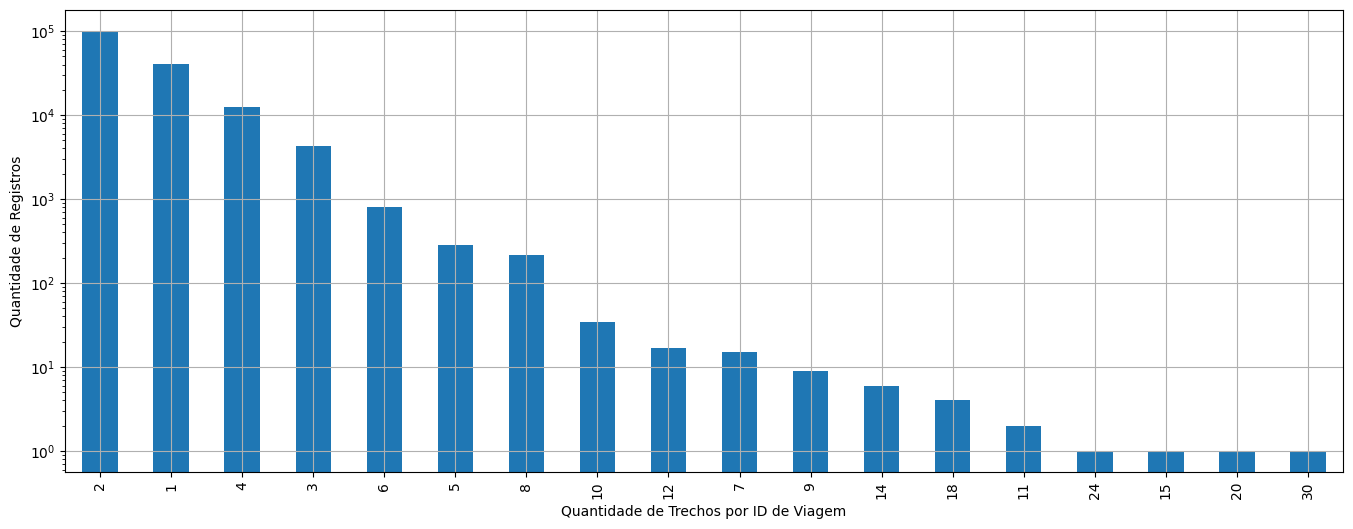

In [23]:
plt.rcParams['figure.figsize'] = (16.5,6)
df_passagens_1['Identificador do processo de viagem']\
    .value_counts()\
    .value_counts().plot.bar()
plt.xlabel('Quantidade de Trechos por ID de Viagem')
plt.ylabel('Quantidade de Registros')
plt.yscale('log')
plt.grid(True)
plt.show()

In [24]:
grouped = df_passagens_1.groupby('Identificador do processo de viagem').size().to_frame()

In [25]:
grouped[grouped[0].sort_values(ascending=True) ==5]

,0
Identificador do processo de viagem,
18536121,5
18571876,5
18612348,5
18616994,5
18617422,5
...,...
19412316,5
19447072,5
2023000289,5


In [26]:
'''
Exemplo de uma viagem com 2 trechos
'''
df_passagens_1[ df_passagens_1['Identificador do processo de viagem'] == 18352553]

,Identificador do processo de viagem,Número da Proposta (PCDP),Meio de transporte,País - Origem ida,UF - Origem ida,Cidade - Origem ida,País - Destino ida,UF - Destino ida,Cidade - Destino ida,País - Origem volta,UF - Origem volta,Cidade - Origem volta,Pais - Destino volta,UF - Destino volta,Cidade - Destino volta,Valor da passagem,Taxa de serviço,Data da emissão/compra,Hora da emissão/compra,0
10,18352553,000005/23-1C,AEREO,ESTADOS UNIDOS DA AMERICA,None,NOVA YORK,BRASIL,DISTRITO FEDERAL,BRASILIA,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,6506.9,0.0,21/09/2022,15:22,4.0
11,18352553,000005/23-1C,AEREO,BRASIL,DISTRITO FEDERAL,BRASILIA,ESTADOS UNIDOS DA AMERICA,None,NOVA YORK,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,6531.6,0.0,21/09/2022,15:22,4.0


In [27]:
'''
Exemplo de uma viagem com 5 trechos
'''
df_passagens_1[ df_passagens_1['Identificador do processo de viagem'] == 18536121]

,Identificador do processo de viagem,Número da Proposta (PCDP),Meio de transporte,País - Origem ida,UF - Origem ida,Cidade - Origem ida,País - Destino ida,UF - Destino ida,Cidade - Destino ida,País - Origem volta,UF - Origem volta,Cidade - Origem volta,Pais - Destino volta,UF - Destino volta,Cidade - Destino volta,Valor da passagem,Taxa de serviço,Data da emissão/compra,Hora da emissão/compra,0
793,18536121,000085/23-3C,AEREO,REINO UNIDO,None,LONDRES,BRASIL,DISTRITO FEDERAL,BRASILIA,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,4628.24,0.0,16/11/2022,22:12,9.0
794,18536121,000085/23-3C,AEREO,BRASIL,DISTRITO FEDERAL,BRASILIA,REINO UNIDO,None,LONDRES,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,3255.42,0.0,16/11/2022,22:12,9.0
795,18536121,000085/23-3C,AEREO,REINO UNIDO,None,LONDRES,BRASIL,DISTRITO FEDERAL,BRASILIA,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,19520.02,0.0,24/01/2023,11:58,9.0
796,18536121,000085/23-3C,AEREO,REINO UNIDO,None,LONDRES,ITALIA,None,PISA,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,3244.60,0.0,22/12/2022,15:25,9.0
797,18536121,000085/23-3C,AEREO,ITALIA,None,ROMA,BRASIL,DISTRITO FEDERAL,BRASILIA,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,8910.20,0.0,22/12/2022,15:25,9.0


In [28]:
"""
Vamos criar uma coluna que identifica se o trecho faz parte de uma viagem internacional ou não
"""

# vamos marcar trechos que são de origem ou destino internacional
df_passagens_1['Trecho Internacional'] = \
    (df_passagens_1['País - Origem ida'] != 'BRASIL') | (df_passagens_1['País - Destino ida'] != 'BRASIL') \
    | ( df_passagens_1['País - Origem volta'].notnull() & ((df_passagens_1['País - Origem volta'] != 'BRASIL') | (df_passagens_1['Pais - Destino volta'] != 'BRASIL'))) \

df_passagens_1[df_passagens_1['Trecho Internacional']].head()

,Identificador do processo de viagem,Número da Proposta (PCDP),Meio de transporte,País - Origem ida,UF - Origem ida,Cidade - Origem ida,País - Destino ida,UF - Destino ida,Cidade - Destino ida,País - Origem volta,...,Cidade - Origem volta,Pais - Destino volta,UF - Destino volta,Cidade - Destino volta,Valor da passagem,Taxa de serviço,Data da emissão/compra,Hora da emissão/compra,0,Trecho Internacional
0,18288418,000007/23-1C,AEREO,BRASIL,DISTRITO FEDERAL,BRASILIA,ESTADOS UNIDOS DA AMERICA,None,NOVA YORK,ESTADOS UNIDOS DA AMERICA,...,NOVA YORK,BRASIL,DISTRITO FEDERAL,BRASILIA,7434.13,0.00,04/11/2022,11:04,3.0,True
1,18302983,000001/23,AEREO,BRASIL,SAO PAULO,SAO PAULO,SUECIA,None,GOTEMBURGO,SUECIA,...,GOTEMBURGO,BRASIL,SAO PAULO,SAO PAULO,9903.32,4999.78,15/09/2022,13:39,1.0,True
2,18306758,000002/23,AEREO,BRASIL,SAO PAULO,SAO PAULO,SUECIA,None,GOTEMBURGO,SUECIA,...,GOTEMBURGO,BRASIL,SAO PAULO,SAO PAULO,9903.32,4999.78,15/09/2022,13:42,1.0,True
3,18306785,000004/23,AEREO,BRASIL,SAO PAULO,SAO PAULO,SUECIA,None,GOTEMBURGO,SUECIA,...,GOTEMBURGO,BRASIL,SAO PAULO,SAO PAULO,9903.32,4999.78,15/09/2022,13:51,1.0,True
4,18306786,000003/23,AEREO,BRASIL,SAO PAULO,SAO PAULO,SUECIA,None,GOTEMBURGO,SUECIA,...,GOTEMBURGO,BRASIL,SAO PAULO,SAO PAULO,9903.32,4999.78,15/09/2022,13:48,1.0,True


In [29]:
# quais viagens possuem ao menos um trecho internacional
df_viagens_internacionais = \
    df_passagens_1[['Identificador do processo de viagem','Trecho Internacional']]\
    .groupby('Identificador do processo de viagem', as_index=False)\
    .max()

df_viagens_internacionais.head()

,Identificador do processo de viagem,Trecho Internacional
0,18288418,True
1,18302983,True
2,18306758,True
3,18306785,True
4,18306786,True


In [30]:
# quais processos de viagem possuem trechos internacionais
df_viagens_internacionais = df_viagens_internacionais.rename(columns={'Trecho Internacional': 'Viagem Internacional'})
df_viagens_internacionais.head()

,Identificador do processo de viagem,Viagem Internacional
0,18288418,True
1,18302983,True
2,18306758,True
3,18306785,True
4,18306786,True


In [31]:
df_passagens_2 = pd.merge(
        df_passagens_1, df_viagens_internacionais, how='left',
                          left_on='Identificador do processo de viagem', right_on='Identificador do processo de viagem')
df_passagens_2.head()

,Identificador do processo de viagem,Número da Proposta (PCDP),Meio de transporte,País - Origem ida,UF - Origem ida,Cidade - Origem ida,País - Destino ida,UF - Destino ida,Cidade - Destino ida,País - Origem volta,...,Pais - Destino volta,UF - Destino volta,Cidade - Destino volta,Valor da passagem,Taxa de serviço,Data da emissão/compra,Hora da emissão/compra,0,Trecho Internacional,Viagem Internacional
0,18288418,000007/23-1C,AEREO,BRASIL,DISTRITO FEDERAL,BRASILIA,ESTADOS UNIDOS DA AMERICA,None,NOVA YORK,ESTADOS UNIDOS DA AMERICA,...,BRASIL,DISTRITO FEDERAL,BRASILIA,7434.13,0.00,04/11/2022,11:04,3.0,True,True
1,18302983,000001/23,AEREO,BRASIL,SAO PAULO,SAO PAULO,SUECIA,None,GOTEMBURGO,SUECIA,...,BRASIL,SAO PAULO,SAO PAULO,9903.32,4999.78,15/09/2022,13:39,1.0,True,True
2,18306758,000002/23,AEREO,BRASIL,SAO PAULO,SAO PAULO,SUECIA,None,GOTEMBURGO,SUECIA,...,BRASIL,SAO PAULO,SAO PAULO,9903.32,4999.78,15/09/2022,13:42,1.0,True,True
3,18306785,000004/23,AEREO,BRASIL,SAO PAULO,SAO PAULO,SUECIA,None,GOTEMBURGO,SUECIA,...,BRASIL,SAO PAULO,SAO PAULO,9903.32,4999.78,15/09/2022,13:51,1.0,True,True
4,18306786,000003/23,AEREO,BRASIL,SAO PAULO,SAO PAULO,SUECIA,None,GOTEMBURGO,SUECIA,...,BRASIL,SAO PAULO,SAO PAULO,9903.32,4999.78,15/09/2022,13:48,1.0,True,True


In [32]:
df_passagens_2[(df_passagens_2['Trecho Internacional'] == False) & (df_passagens_2['Viagem Internacional'] == True)]

,Identificador do processo de viagem,Número da Proposta (PCDP),Meio de transporte,País - Origem ida,UF - Origem ida,Cidade - Origem ida,País - Destino ida,UF - Destino ida,Cidade - Destino ida,País - Origem volta,...,Pais - Destino volta,UF - Destino volta,Cidade - Destino volta,Valor da passagem,Taxa de serviço,Data da emissão/compra,Hora da emissão/compra,0,Trecho Internacional,Viagem Internacional
24,18398807,000001/23-1C,AEREO,BRASIL,AMAZONAS,MANAUS,BRASIL,AMAZONAS,PARINTINS,BRASIL,...,BRASIL,AMAZONAS,MANAUS,690.43,0.0,07/10/2022,17:20,3.0,False,True
26,18398856,000002/23-1C,AEREO,BRASIL,AMAZONAS,MANAUS,BRASIL,AMAZONAS,PARINTINS,BRASIL,...,BRASIL,AMAZONAS,MANAUS,1275.93,0.0,07/10/2022,17:18,3.0,False,True
1951,18604765,000006/23-1C,AEREO,BRASIL,SERGIPE,ARACAJU,BRASIL,AMAPA,MACAPA,BRASIL,...,BRASIL,SERGIPE,ARACAJU,2445.64,0.0,22/12/2022,15:37,5.0,False,True
3192,18623687,000129/23-2C,AEREO,BRASIL,MINAS GERAIS,BELO HORIZONTE,BRASIL,SAO PAULO,SAO PAULO,BRASIL,...,BRASIL,MINAS GERAIS,BELO HORIZONTE,1059.96,0.0,22/12/2022,18:32,4.0,False,True
5366,18632947,000012/23-1C,AEREO,BRASIL,SAO PAULO,SAO PAULO,BRASIL,DISTRITO FEDERAL,BRASILIA,BRASIL,...,BRASIL,SAO PAULO,SAO PAULO,4626.10,0.0,18/01/2023,12:12,3.0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306828,19430498,002801/23-1C,AEREO,BRASIL,DISTRITO FEDERAL,BRASILIA,BRASIL,AMAPA,MACAPA,BRASIL,...,BRASIL,DISTRITO FEDERAL,BRASILIA,5570.63,0.0,30/10/2023,16:18,5.0,False,True
307078,19433284,004535/23,AEREO,BRASIL,DISTRITO FEDERAL,BRASILIA,BRASIL,TOCANTINS,PALMAS,BRASIL,...,BRASIL,DISTRITO FEDERAL,BRASILIA,5469.54,0.0,23/10/2023,15:59,3.0,False,True
307082,19433308,003960/23-1C,AEREO,BRASIL,DISTRITO FEDERAL,BRASILIA,BRASIL,PERNAMBUCO,RECIFE,BRASIL,...,BRASIL,DISTRITO FEDERAL,BRASILIA,5396.05,0.0,23/10/2023,20:30,3.0,False,True
308783,19450343,056985/23-1C,AEREO,BRASIL,SAO PAULO,GUARULHOS,BRASIL,DISTRITO FEDERAL,BRASILIA,BRASIL,...,BRASIL,SAO PAULO,GUARULHOS,2715.95,0.0,27/10/2023,11:33,2.0,False,True


In [33]:
df_passagens_2[df_passagens_2['Identificador do processo de viagem'] == 19430498]

,Identificador do processo de viagem,Número da Proposta (PCDP),Meio de transporte,País - Origem ida,UF - Origem ida,Cidade - Origem ida,País - Destino ida,UF - Destino ida,Cidade - Destino ida,País - Origem volta,...,Pais - Destino volta,UF - Destino volta,Cidade - Destino volta,Valor da passagem,Taxa de serviço,Data da emissão/compra,Hora da emissão/compra,0,Trecho Internacional,Viagem Internacional
306827,19430498,002801/23-1C,AEREO,BRASIL,AMAPA,MACAPA,BRASIL,DISTRITO FEDERAL,BRASILIA,SEM INFORMACAO,...,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,2217.12,0.0,06/11/2023,15:21,5.0,True,True
306828,19430498,002801/23-1C,AEREO,BRASIL,DISTRITO FEDERAL,BRASILIA,BRASIL,AMAPA,MACAPA,BRASIL,...,BRASIL,DISTRITO FEDERAL,BRASILIA,5570.63,0.0,30/10/2023,16:18,5.0,False,True
306829,19430498,002801/23-1C,AEREO,BRASIL,DISTRITO FEDERAL,BRASILIA,BRASIL,AMAPA,MACAPA,SEM INFORMACAO,...,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,3019.41,0.0,06/11/2023,15:21,5.0,True,True


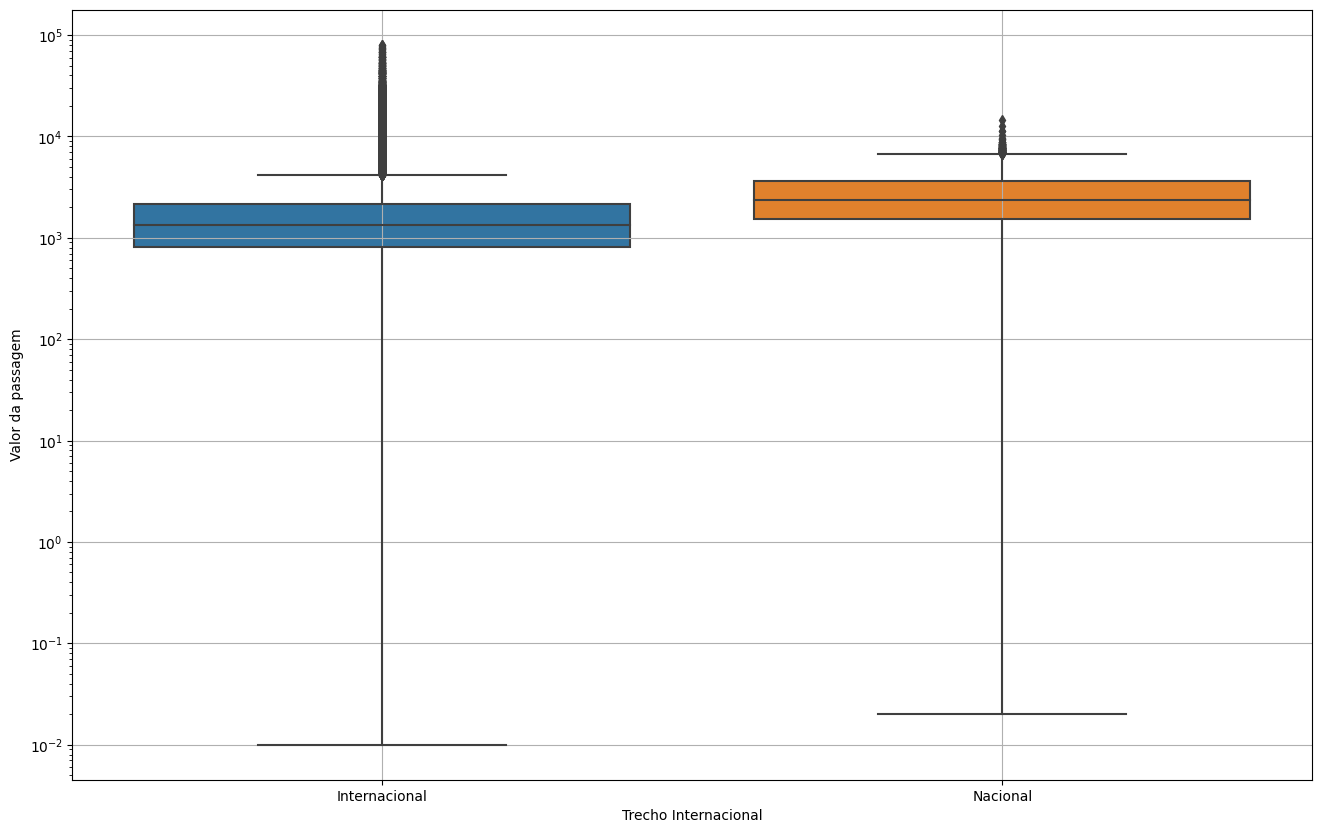

In [34]:
df_passagens_g = df_passagens_2[df_passagens_2['Valor da passagem'] > 0.001]
plt.rcParams['figure.figsize'] = 16,10
ax = sns.boxplot(y=df_passagens_g['Valor da passagem'], x=df_passagens_g['Trecho Internacional'].apply(lambda x: 'Internacional' if x else 'Nacional'))
ax.set_yscale('log')
plt.grid(True)
plt.show()

In [35]:
dataset_passagem.tail(10)

NameError: ignored

In [ ]:
# Mostra as informações do dataset
dataset_passagem.info()

In [ ]:
dataset_passagem['Identificador do processo de viagem'] = dataset_passagem['Identificador do processo de viagem'].astype(str)

In [ ]:
dataset_passagem['Valor da passagem'] = dataset_passagem['Valor da passagem'].apply(converter_numero)

In [ ]:
def converter_data(dt):
    try:
        return datetime.strptime(dt, '%d/%m/%Y').date()
    except:
        return np.nan

In [ ]:
dataset_passagem['Data da emissão/compra'] = dataset_passagem['Data da emissão/compra'].apply(converter_data)

In [ ]:
dataset_passagem.info()

In [ ]:
dataset_trecho = pd.read_csv("../2023_Trecho.csv", encoding='latin1', on_bad_lines = 'warn', sep=';')

In [ ]:
# Mostra as dimensões do dataset
dataset_trecho.shape

In [ ]:
dataset_trecho.head(10)

In [ ]:
dataset_trecho.tail(10)

In [ ]:
# Mostra as informações do dataset
dataset_trecho.info()

In [ ]:
dataset_trecho['Identificador do processo de viagem '] = dataset_trecho['Identificador do processo de viagem '].astype(str)

In [ ]:
dataset_trecho.info()

In [ ]:
dataset_trecho.head()

In [ ]:
dataset_viagem = pd.read_csv("../2023_Viagem.csv", encoding='latin1', on_bad_lines = 'warn', sep=';')

In [ ]:
# Mostra as dimensões do dataset
dataset_viagem.shape

In [ ]:
dataset_viagem.head(10)

In [ ]:
dataset_viagem.tail(10)

In [ ]:
# Mostra as informações do dataset
dataset_viagem.info()